# PID control on TCLab

This notebook and the associated `pidgui.py` allows you to play with a very basic position form discrete PID using either a modelled version or the real Temperature control lab.

In [1]:
from tclab.gui import NotebookUI
from pidgui import PIDGUI

In [2]:
%matplotlib notebook

In [3]:
interface = NotebookUI(PIDGUI)

VBox(children=(HBox(children=(HBox(children=(Checkbox(value=False, description='Use model'), FloatSlider(value=1.0, description='Speedup', disabled=True, max=10.0, min=1.0))), HBox(children=(Button(description='Connect', style=ButtonStyle()), Button(description='Start', disabled=True, style=ButtonStyle()), Button(description='Stop', disabled=True, style=ButtonStyle()), Button(description='Disconnect', disabled=True, style=ButtonStyle()))))), HBox(children=(HBox(children=(Label(value='Timestamp:'), Label(value='No data'), Label(value=''))), HBox(children=(Label(value='Session:'), Label(value='No data'), Label(value=''))))), VBox(children=(HBox(children=(Button(description='Auto', disabled=True, style=ButtonStyle()), Button(description='Manual', disabled=True, style=ButtonStyle()))), HBox(children=(FloatSlider(value=1.0, description='Gain', disabled=True), FloatSlider(value=100.0, description='$\\tau_I$', disabled=True), FloatSlider(value=0.0, description='$\\tau_D$', disabled=True, max=10.0))), HBox(children=(FloatSlider(value=30.0, description='Setpoint', disabled=True, max=70.0, min=20.0), FloatSlider(value=0.0, description='Q1', disabled=True)))))))

TCLab version 0.4.9dev
Simulated TCLab


<IPython.core.display.Javascript object>


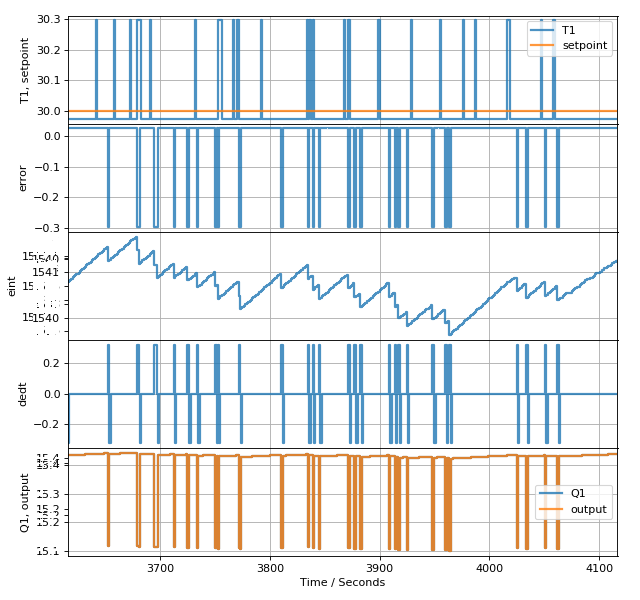

In [4]:
interface.gui

# Programmatic interaction

We can interact with the interface while it is running. The controller is in the interface. 
**Note that you will have to start the controller and switch to auto to see the effect of these cells:**

In [5]:
controller = interface.controller

In [6]:
controller.pid.eint = 0

In [ ]:
controller.setpoint.value = 42

# Advanced usage

Below we set up an experiment which will change the setpoint and increase the gain every 10 minutes.

In [ ]:
import tornado

def stepgain():
    if controller.setpoint.value == 45:
        controller.setpoint.value = 40
    else:
        controller.setpoint.value = 45
    controller.gain.value *= 1.1
    if controller.gain.value > 100:
        steptimer.stop()
        interface.action_stop(None)

minute = 60*1000  # a minute in milliseconds
steptimer = tornado.ioloop.PeriodicCallback(stepgain, 10*minute)

steptimer.start()

You can stop the timer by calling `.stop()`

In [ ]:
steptimer.stop()

# Accessing the historian

The interface contains a historian. You can see the sessions it has stored like this:

In [ ]:
interface.historian.get_sessions()

You can roll the historian back to a session by using `load_session`. Note you shouldn't do this while the interface is connected.

In [ ]:
interface.historian.load_session(1)

# More detailed analysis
We can analyse the results of the experiments we have made using Pandas:

In [ ]:
import pandas

In [ ]:
allresults = pandas.DataFrame.from_records(interface.historian.log, columns=interface.historian.columns, index='Time')